        x         y         z
0    0.00  1.000000  1.000000
1    0.01  1.010101  1.018434
2    0.02  1.020408  1.037056
3    0.03  1.030926  1.055868
4    0.04  1.041662  1.074872
..    ...       ...       ...
136  1.36  4.818595  4.956947
137  1.37  4.872043  5.015411
138  1.38  4.927116  5.074249
139  1.39  4.983738  5.133320
140  1.40  5.041809  5.192479

[141 rows x 3 columns]



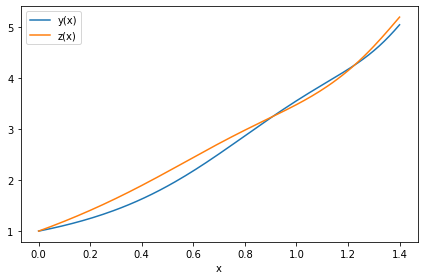

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
Fourth order Runge-Kutta method of the system of diff. eqs.
  y' = f(x,y,z)
  z' = g(x,y,z)
'''

def f(x,y,z):
  return y + np.sin(x*z)

def g(x,y,z):
  return z + np.cos(x*y)

x0, xn = 0, 1.4     # interval of x
y0, z0 = 1, 1       # initial values
h = 0.01            # step-size
n = (xn - x0)/h

x = [x0]
y = [y0]
z = [z0]
xi, yi, zi = x0, y0, z0
for i in range(int(np.ceil(n))):
  k1 = h * f(xi, yi, zi)
  l1 = h * g(xi, yi, zi)
  k2 = h * f(xi + h/2, yi + k1/2, zi + l1/2)
  l2 = h * g(xi + h/2, yi + k1/2, zi + l1/2)
  k3 = h * f(xi + h/2, yi + k2/2, zi + l2/2)
  l3 = h * g(xi + h/2, yi + k2/2, zi + l2/2)
  k4 = h * f(xi + h, yi + k3, zi + l3)
  l4 = h * f(xi + h, yi + k3, zi + l3)
  yi += (k1 + 2*k2 + 2*k3 + k4)/6
  zi += (l1 + 2*l2 + 2*l3 + l4)/6
  xi += h
  x.append(xi)
  y.append(yi)
  z.append(zi)
solution = pd.DataFrame({'x': x, 'y': y, 'z': z})
print(solution)
print()

plt.plot(x, y)
plt.plot(x, z)
plt.legend(['y(x)', 'z(x)'])
plt.xlabel('x')
plt.tight_layout()
plt.show()